In [1]:
#--------------------------------------------------------------------------------------------------------
#Project:
#Image Classification with Convolutional Neural Network (CNN) using CIFAR-10 Dataset.


#Team Member:
#Name: Smit Rajeshkumar Patel
#Student ID: 030975566
#Email ID: SmitRajeshkumar.Patel01@student.csulb.edu


# MODEL 3
#--------------------------------------------------------------------------------------------------------

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, UpSampling2D, GlobalAveragePooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.utils import to_categorical

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
# Dataset Overview
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Number of training samples:", x_train.shape[0])
print("Number of testing samples:", x_test.shape[0])

print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)
print("Number of training labels:", y_train.shape[0])
print("Number of testing labels:", y_test.shape[0])

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of training samples: 50000
Number of testing samples: 10000
Training labels shape: (50000, 1)
Testing labels shape: (10000, 1)
Number of training labels: 50000
Number of testing labels: 10000


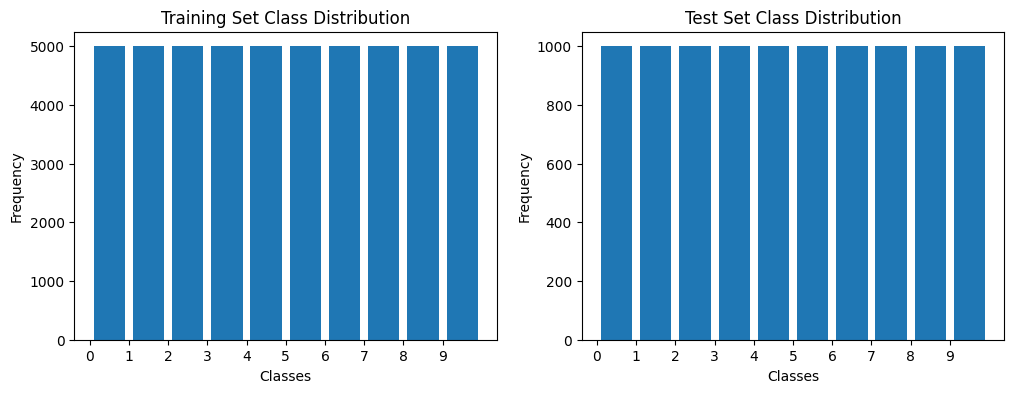

In [5]:
# Display class distribution in the training and test sets
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(y_train, bins=range(11), rwidth=0.8)
axs[0].set_title('Training Set Class Distribution')
axs[0].set_xticks(np.arange(10))
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Frequency')

axs[1].hist(y_test, bins=range(11), rwidth=0.8)
axs[1].set_title('Test Set Class Distribution')
axs[1].set_xticks(np.arange(10))
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Frequency')
plt.show()

In [6]:
# Preprocess image input
train_X = preprocess_input(x_train)
valid_X = preprocess_input(x_test)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Load the ResNet50 model with pre-trained weights
resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 3s 0us/step


In [8]:
# Construct the sequential model
model_3 = Sequential([
    Input(shape=(32, 32, 3)),
    UpSampling2D(size=(7, 7)),
    resnet_model,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(1024, activation="relu"),
    Dense(512, activation="relu"),
    Dense(10, activation="softmax", name="classification")
])

In [9]:
# Compile the model
model_3.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

In [10]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, 224, 224, 3)       0         
 D)                                                              
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               5

In [11]:
# Train the model
history = model_3.fit(train_X, y_train, epochs=6, validation_data=(valid_X, y_test), batch_size=64)

Epoch 1/6
782/782 [==============================] - 589s 716ms/step - loss: 0.4009 - accuracy: 0.8697 - precision: 0.9246 - recall: 0.8158 - val_loss: 0.2336 - val_accuracy: 0.9211 - val_precision: 0.9339 - val_recall: 0.9068
Epoch 2/6
782/782 [==============================] - 543s 694ms/step - loss: 0.1024 - accuracy: 0.9662 - precision: 0.9718 - recall: 0.9611 - val_loss: 0.2937 - val_accuracy: 0.9086 - val_precision: 0.9162 - val_recall: 0.9018
Epoch 3/6
782/782 [==============================] - 555s 710ms/step - loss: 0.0352 - accuracy: 0.9898 - precision: 0.9911 - recall: 0.9885 - val_loss: 0.1962 - val_accuracy: 0.9406 - val_precision: 0.9467 - val_recall: 0.9373
Epoch 4/6
782/782 [==============================] - 556s 711ms/step - loss: 0.0136 - accuracy: 0.9972 - precision: 0.9976 - recall: 0.9969 - val_loss: 0.1722 - val_accuracy: 0.9519 - val_precision: 0.9548 - val_recall: 0.9500
Epoch 5/6
782/782 [==============================] - 555s 710ms/step - loss: 0.0067 - accura

In [12]:
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model_3.evaluate(valid_X, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

313/313 [==============================] - 32s 95ms/step - loss: 0.1813 - accuracy: 0.9542 - precision: 0.9559 - recall: 0.9526
Test Accuracy: 0.954200029373169
Test Precision: 0.9559457898139954
Test Recall: 0.9526000022888184


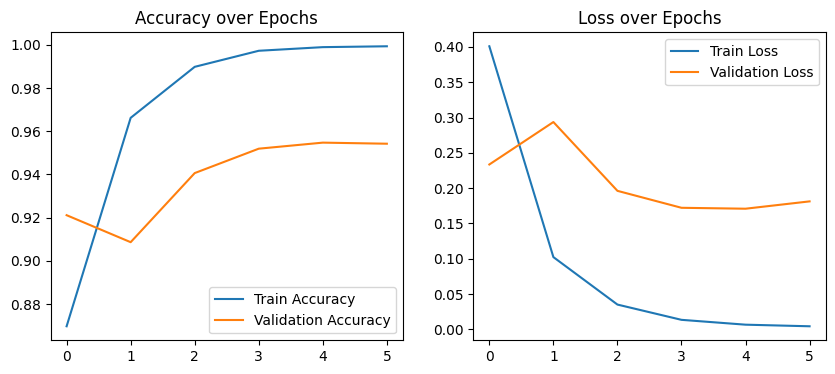

In [13]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [14]:
# Predictions for confusion matrix
y_pred = model_3.predict(valid_X)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 30s 92ms/step


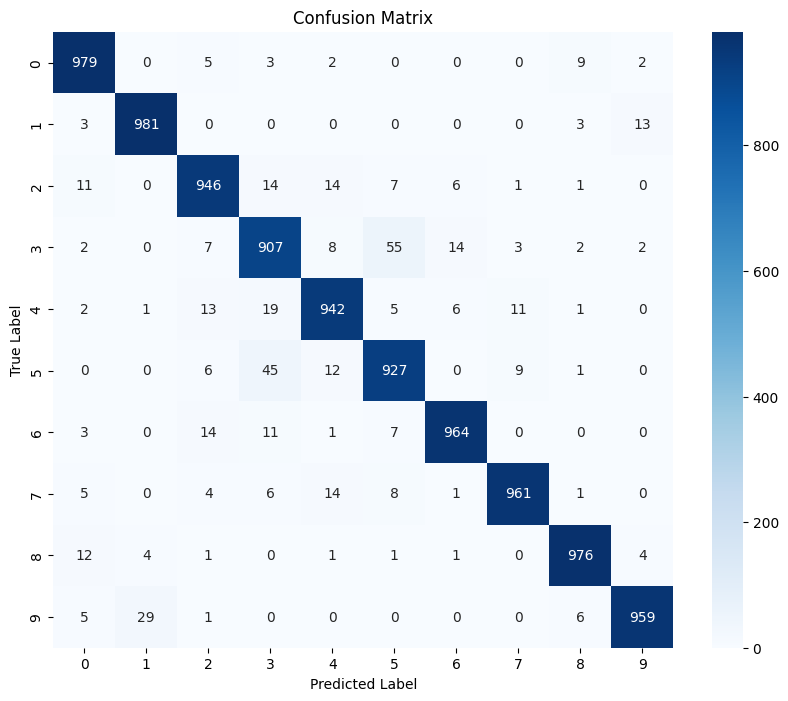

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()